<a href="https://colab.research.google.com/github/triandosimarmata/myprojects/blob/main/CMAES.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Processing generation: 0
Processing generation: 1
Processing generation: 2
Processing generation: 3
Processing generation: 4
Processing generation: 5
Processing generation: 6
Processing generation: 7
Processing generation: 8
Processing generation: 9
Processing generation: 10
Processing generation: 11
Processing generation: 12
Processing generation: 13
Processing generation: 14
Processing generation: 15
Processing generation: 16
Processing generation: 17
Processing generation: 18
Processing generation: 19
Processing generation: 20
Processing generation: 21
Processing generation: 22
Processing generation: 23
Processing generation: 24
Processing generation: 25
Processing generation: 26
Processing generation: 27
Processing generation: 28
Processing generation: 29
Processing generation: 30
Processing generation: 31
Processing generation: 32
Processing generation: 33
Processing generation: 34
Processing generation: 35
Processing generation: 36
Processing generation: 37
Processing generation:

,generation,value,x1,x2
0,0,35.775230,-1.675282,-1.626945
1,1,25.994704,-1.698878,-2.197870
2,2,23.915457,-1.180133,-2.253810
3,3,11.003265,-0.228776,-1.923956
4,4,5.808035,5.036480,-1.871129
...,...,...,...,...
220,220,0.000000,3.000000,-2.000000
221,221,0.000000,3.000000,-2.000000
222,222,0.000000,3.000000,-2.000000
223,223,0.000000,3.000000,-2.000000



Generations present in best_results_per_generation DataFrame:
[  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125
 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143
 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161
 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179
 180 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197
 198 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215
 216 217 218 219 220 221 222 223 224]


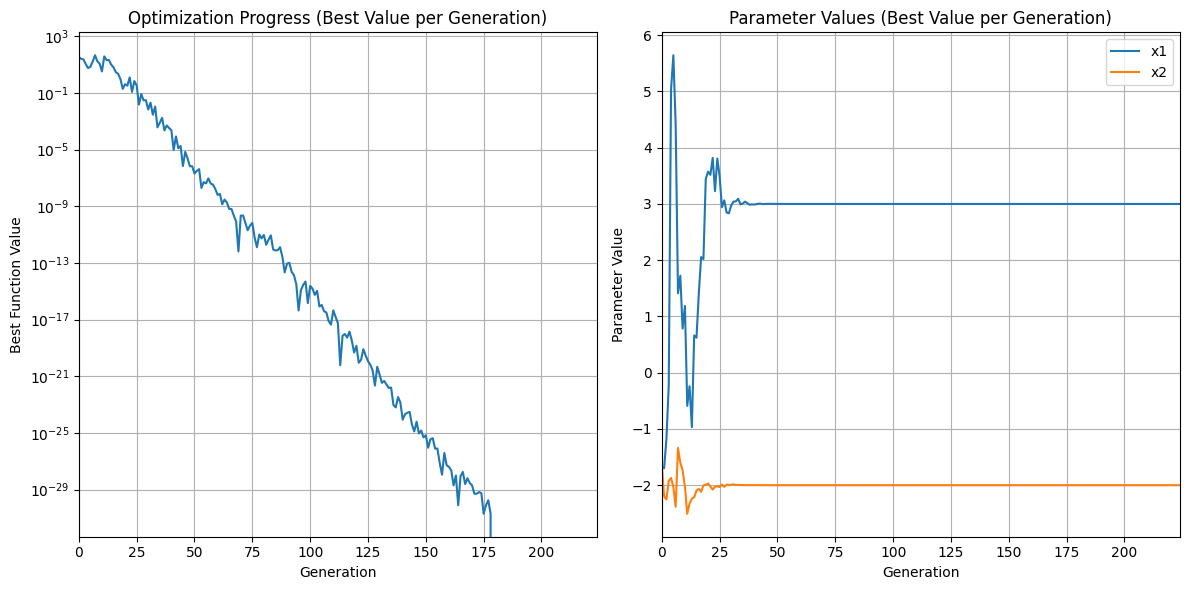

In [29]:
!pip install cmaes
import numpy as np
import cmaes as cma
import pandas as pd
import matplotlib.pyplot as plt
import re
import matplotlib.ticker as mticker # Import matplotlib.ticker

def quadratic(x1, x2):
    return (x1 - 3) ** 2 + (10 * (x2 + 2)) ** 2


if __name__ == "__main__":
    optimizer = cma.CMA(mean=np.zeros(2), sigma=1.3)

    num_generations = 175 # Define the number of generations

    # Lists to store best results per generation
    generations_list = []
    best_values_list = []
    best_x1_list = []
    best_x2_list = []


    for generation in range(num_generations):
        print(f"Processing generation: {generation}") # Added print statement
        solutions = []
        current_best_value = float('inf') # Initialize with a large value for minimization
        current_best_x = None

        for _ in range(optimizer.population_size):
            x = optimizer.ask()
            # Use the original quadratic function for minimization
            value = quadratic(x[0], x[1])
            solutions.append((x, value))

            # Track the best value in the current generation
            if value < current_best_value:
                current_best_value = value
                current_best_x = x

        optimizer.tell(solutions)

        # Store the best result for this generation
        generations_list.append(generation)
        best_values_list.append(current_best_value)
        best_x1_list.append(current_best_x[0])
        best_x2_list.append(current_best_x[1])


    # Create a DataFrame from the collected lists
    best_results_per_generation = pd.DataFrame({
        "generation": generations_list,
        "value": best_values_list,
        "x1": best_x1_list,
        "x2": best_x2_list
    })


    # Display the DataFrame with the best result (minimum value) per generation
    display(best_results_per_generation)

    # Check and print the generations present in the best_results_per_generation DataFrame
    print("\nGenerations present in best_results_per_generation DataFrame:")
    print(best_results_per_generation['generation'].unique())


    # Visualize the optimization progress
    plt.figure(figsize=(12, 6))

    plt.subplot(1, 2, 1)
    # Explicitly use the 'generation' column for the x-axis
    plt.plot(best_results_per_generation['generation'], best_results_per_generation['value'])
    plt.xlabel('Generation')
    plt.ylabel('Best Function Value')
    plt.title('Optimization Progress (Best Value per Generation)')
    plt.yscale('log') # Set y-axis to logarithmic scale
    plt.grid(True)
    plt.xlim(0, num_generations - 1) # Set x-axis limit

    plt.subplot(1, 2, 2)
    # Explicitly use the 'generation' column for the x-axis
    plt.plot(best_results_per_generation['generation'], best_results_per_generation['x1'], label='x1')
    plt.plot(best_results_per_generation['generation'], best_results_per_generation['x2'], label='x2')
    plt.xlabel('Generation')
    plt.ylabel('Parameter Value')
    plt.title('Parameter Values (Best Value per Generation)')
    plt.legend()
    plt.grid(True)
    plt.xlim(0, num_generations - 1) # Set x-axis limit



    plt.tight_layout()
    plt.show()

In [28]:
# Find the row with the minimum value across all generations
min_value_row = best_results_per_generation.loc[best_results_per_generation['value'].idxmin()]

# Extract the best value and corresponding x1 and x2
min_value = min_value_row['value']
min_x1 = min_value_row['x1']
min_x2 = min_value_row['x2']

print(f"Overall best result:")
print(f"  Function Value: {min_value}")
print(f"  x1: {min_x1}")
print(f"  x2: {min_x2}")

Overall best result:
  Function Value: 0.0
  x1: 3.0
  x2: -2.0
